## Importing Datset:
    
- Since data is in form of excel file we have to use pandas read_excel to load the data
- After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row.
- Check whether any null values are there or not. If it is present then following can be done,
 
A) Imputing data using imputation method in sklearn

B) Filling NaN values with mean, median and mode using fillna() method.

- Describe data --> Which can give statistical analysis

In [1692]:
# suppressing the warnings

import warnings
warnings.filterwarnings('ignore')

In [1693]:
# Importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)


sns.set()

In [1694]:
# Reading excel file using read_excel

train_data = pd.read_excel('Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [1695]:
# To pop-up the autoupdate of command use " Tab + shift"

In [1696]:
# Checking value count

train_data.shape

(10683, 11)

In [1697]:
# Checking Numerical attributes of data

train_data.describe(include = 'all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [1698]:
# Cheacking the columns of dataframe

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [1699]:
# Checking null values in dataset

train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

__Here we have very low count for missing values, so dropping them.__

In [1700]:
train_data = train_data.dropna()

In [1701]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [1702]:
# Checking shape of dataset

train_data.shape

(10682, 11)

## EDA 

From description we can see that Date_of_Journey is a object data type, 
therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas `to_datetime` to convert object data type to datetime dtype.

<font color='green'>__.dt.day method will extract only day of that date__</font>

<font color='green'>__.dt.month method will extract onlu month of that date__</font>

### Train Column:  `Date_of_Journey`

In [1703]:
# Extracting day from column Date_of_Journey

train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format = "%d/%m/%Y").dt.day

In [1704]:
# Extracting month from column Date_of_Journey

train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'],format = '%d/%m/%Y').dt.month

In [1705]:
# Dropping column 'Date_of_Journey'

train_data = train_data.drop('Date_of_Journey', axis = 1)
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


### Train Column `Dep_Time`

In [1706]:
# Extracting hour from column 'Dep_Time'

train_data['Dep_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

In [1707]:
# Extracting minute from column 'Dep_Time'

train_data['Dep_minute'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [1708]:
# Dropping column 'Dep_time'

train_data = train_data.drop('Dep_Time', axis = 1)
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


### Train Column `Arrival_Time`

In [1709]:
# Extracting hours from column 'Arrival_Time'

train_data['Arrival_hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [1710]:
# Extracting minute from column 'Arrivl_Time'

train_data['Arrival_minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [1711]:
# Dropping column 'Arrival_Time'

train_data = train_data.drop('Arrival_Time', axis = 1)

train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


### Train Column `Duration`

In [1712]:
# Extrating hour form column 'Duration'

def func_hour(x):
    
    return (x.split('h'))[0]

train_data['Duration_hour'] = train_data['Duration'].apply(func_hour)

train_data['Duration_hour'] = train_data['Duration_hour'].replace('5m', '5')

train_data['Duration_hour'] = train_data['Duration_hour'].astype('int64')


In [1713]:
# Extrating minute form column 'Duration'

def func_min(x):
    try:
        a = ((x.split('h'))[1])
        
        return ((a.replace('m','')).strip())
    
    except IndexError:
        
        return '0'

    
train_data['Duration_min'] = train_data['Duration'].apply(func_min)

train_data['Duration_min'] = train_data['Duration_min'].replace('', '0')

train_data['Duration_min'] = train_data['Duration_min'].astype('int64')


In [1714]:
# Dropping column 'Duration'

train_data = train_data.drop('Duration', axis = 1)

In [1715]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [1716]:
# Another approch
"""
duration = list(train_data['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]   # Adds 0 minute
            
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))  # Extract hours from Duration
    duration_hours.append(int(duration[i].split(sep = 'm')[0].split()[-1]))  # Extract only min
"""

'\nduration = list(train_data[\'Duration\'])\n\nfor i in range(len(duration)):\n    if len(duration[i].split()) != 2:\n        if \'h\' in duration[i]:\n            duration[i] = duration[i].strip() + " 0m"  # Adds 0 minute\n        else:\n            duration[i] = "0h " + duration[i]   # Adds 0 minute\n            \nduration_hours = []\nduration_mins = []\n\nfor i in range(len(duration)):\n    duration_hours.append(int(duration[i].split(sep = \'h\')[0]))  # Extract hours from Duration\n    duration_hours.append(int(duration[i].split(sep = \'m\')[0].split()[-1]))  # Extract only min\n'

### Column `Airline`

### Handling Categorical Data

One can find many ways to handle categorical data.Some of them categorical data are,
1. <font color='blue'> __Nominal data__ </font> --> data are not in any order --> <font color= 'green'> __OneHotEncoder__ </font> is used in this case
2. <font color='blue'> __Ordinal data__ </font> --> data are in order --> <font color= 'green'> __LabelEncoder__ </font> is used in this case

In [1717]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

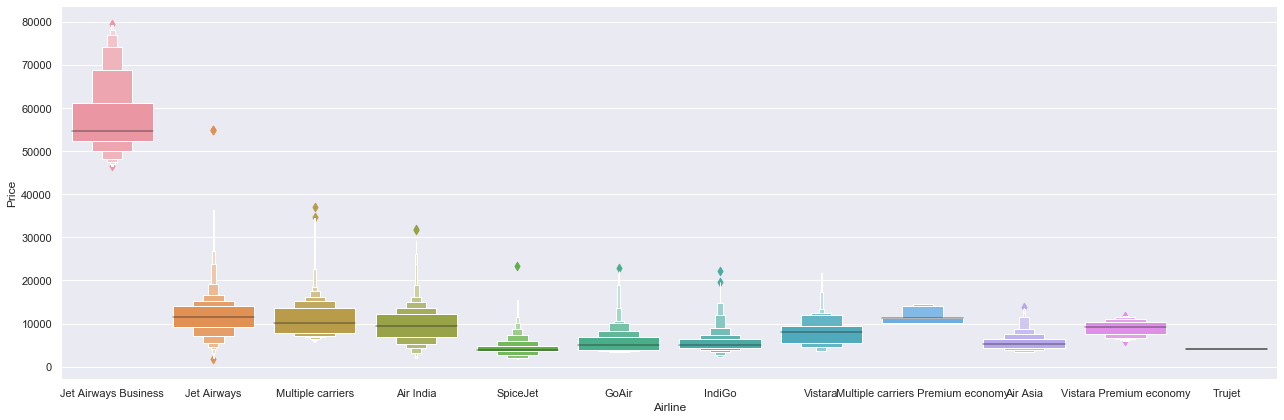

In [1718]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline Vs Price

sns.catplot(y = 'Price', x = 'Airline', data = train_data.sort_values('Price', ascending = False), 
            kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [1719]:
# AS Airline is Nomial Categorical Data we will perform OneHotEncoding

Airline = train_data[['Airline']]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### Train Column `Source`

In [1720]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

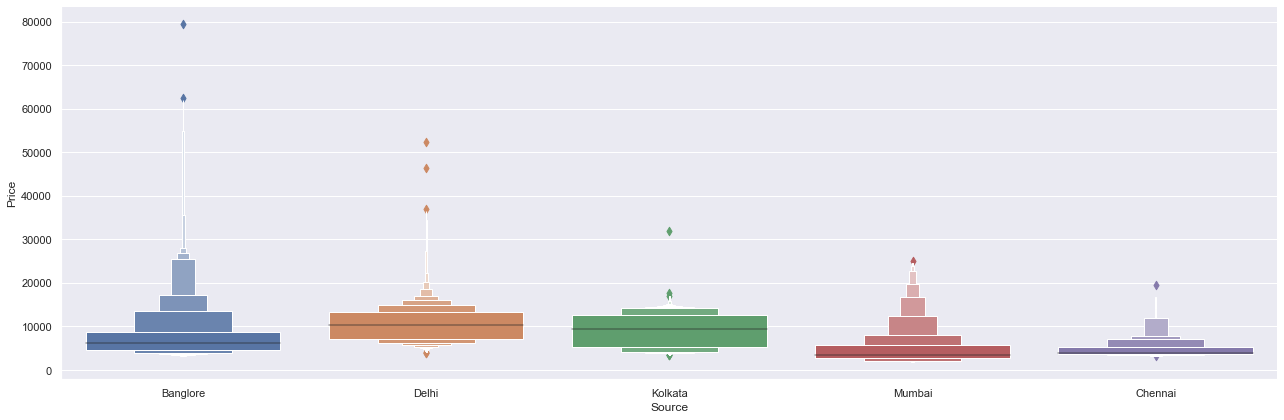

In [1721]:
# Source Vs Price

sns.catplot(y = 'Price', x = 'Source', data = train_data.sort_values('Price', ascending = False), 
            kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [1722]:
# As Source is Nomial Categorical Data we will perform OneHotEncoding

Source = train_data[['Source']]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### Train Column `Destination`

In [1723]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

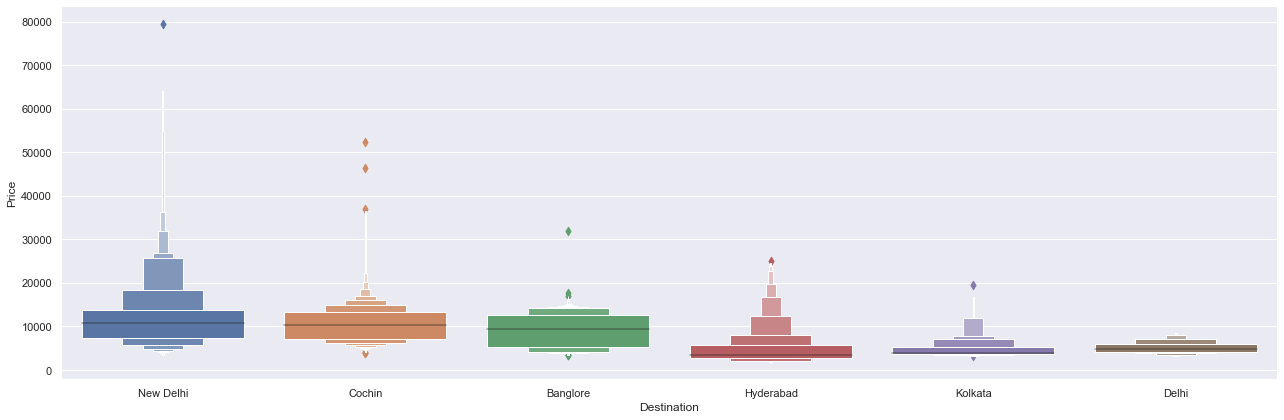

In [1724]:
# Destination Vs Price

sns.catplot(y = 'Price', x = 'Destination', data = train_data.sort_values('Price', ascending = False), 
            kind = 'boxen', height = 6, aspect = 3)
plt.show()

In [1725]:
# As Destination is Nomial Categorical Data we will perform OneHotEncoding

Destination = train_data[['Destination']]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### Train Column `Route` 

In [1726]:
train_data['Route'].value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
DEL → BHO → BOM → COK                  50
CCU → BBI → BLR                        50
CCU → IXR → DEL → BLR             

In [1727]:
# Route and Total_Steps are related to each other

train_data = train_data.drop('Route', axis = 1)

###  Train Column `Additional_Info`

In [1728]:
train_data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [1729]:
100*(train_data['Additional_Info'].value_counts()/ len(train_data))

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [1730]:
# Additional_Info contains almost 80% no_info

train_data = train_data.drop('Additional_Info', axis = 1)

### Train Column `Total_Stops`

In [1731]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [1732]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here values are assigned with corresponding keys

train_data['Total_Stops'] = train_data['Total_Stops'].replace({'non-stop' : 0, '1 stop' : 1, '2 stops' : 2,
                                                              '3 stops' : 3, '4 stops' : 4})

In [1733]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [1734]:
# Concatenate Dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [1735]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1736]:
# Dropping columns : Airline, Source, Destination

data_train = data_train.drop(['Airline', 'Source', 'Destination'], axis = 1)

In [1737]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1775]:
data_train.shape

(10682, 30)

# Test Set

In [1739]:
test_data = pd.read_excel('Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


### Test Column : `Date_of_Journey`

In [1740]:
# Extracting day from column Date_of_Journey

test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'], format = "%d/%m/%Y").dt.day

In [1741]:
# Extracting month from column Date_of_Journey

test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'],format = '%d/%m/%Y').dt.month

In [1742]:
# Dropping column 'Date_of_Journey'

test_data = test_data.drop('Date_of_Journey', axis = 1)
test_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


### Test Column: `Dep_Time`

In [1743]:
# Extracting hour from column 'Dep_Time'

test_data['Dep_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour

In [1744]:
# Extracting minute from column 'Dep_Time'

test_data['Dep_minute'] = pd.to_datetime(test_data['Dep_Time']).dt.minute

In [1745]:
# Dropping column 'Dep_time'

test_data = test_data.drop('Dep_Time', axis = 1)
test_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


### Test Column:  `Arrival_Time`

In [1746]:
# Extracting hours from column 'Arrival_Time'

test_data['Arrival_hour'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour

In [1747]:
# Extracting minute from column 'Arrivl_Time'

test_data['Arrival_minute'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute

In [1748]:
# Dropping column 'Arrival_Time'

test_data = test_data.drop('Arrival_Time', axis = 1)

test_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


### Test Column `Duration`

In [1749]:
# Extrating hour form column 'Duration'

def func_hour(x):
    
    return (x.split('h'))[0]

test_data['Duration_hour'] = test_data['Duration'].apply(func_hour)

test_data['Duration_hour'] = test_data['Duration_hour'].replace('5m', '5')

test_data['Duration_hour'] = test_data['Duration_hour'].astype('int64')

In [1750]:
# Extrating minute form column 'Duration'

def func_min(x):
    try:
        a = ((x.split('h'))[1])
        
        return ((a.replace('m','')).strip())
    
    except IndexError:
        
        return '0'

    
test_data['Duration_min'] = test_data['Duration'].apply(func_min)

test_data['Duration_min'] = test_data['Duration_min'].replace('', '0')

test_data['Duration_min'] = test_data['Duration_min'].astype('int64')

In [1751]:
# Dropping column 'Duration'

test_data = test_data.drop('Duration', axis = 1)

In [1752]:
test_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


### Test Column `Airline`

In [1753]:
test_data['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [1754]:
# AS Airline is Nomial Categorical Data we will perform OneHotEncoding

Airline = test_data[['Airline']]

Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


### Test Column `Source`

In [1755]:
test_data['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [1756]:
# As Source is Nomial Categorical Data we will perform OneHotEncoding

Source = test_data[['Source']]

Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


### Test Column `Destination`

In [1757]:
test_data['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [1758]:
# As Destination is Nomial Categorical Data we will perform OneHotEncoding

Destination = test_data[['Destination']]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


### Test Column `Route` 

In [1759]:
test_data['Route'].value_counts()

DEL → BOM → COK                      624
BLR → DEL                            389
CCU → BOM → BLR                      253
CCU → BLR                            172
BOM → HYD                            164
CCU → DEL → BLR                      124
BLR → BOM → DEL                      107
DEL → HYD → COK                       85
MAA → CCU                             75
DEL → JAI → BOM → COK                 74
DEL → BLR → COK                       55
DEL → COK                             49
DEL → MAA → COK                       44
DEL → AMD → BOM → COK                 41
CCU → HYD → BLR                       27
DEL → IDR → BOM → COK                 18
DEL → HYD → MAA → COK                 17
DEL → GOI → BOM → COK                 15
DEL → CCU → BOM → COK                 15
CCU → MAA → BLR                       13
DEL → HYD → BOM → COK                 12
DEL → NAG → BOM → COK                 12
CCU → DEL → COK → BLR                 12
CCU → IXR → DEL → BLR                 11
DEL → ATQ → BOM 

In [1760]:
# Route and Total_Steps are related to each other

test_data = test_data.drop('Route', axis = 1)

###  Test Column `Additional_Info`

In [1761]:
test_data['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [1762]:
100*(test_data['Additional_Info'].value_counts()/ len(train_data))

No info                         20.108594
In-flight meal not included      4.156525
No check-in baggage included     0.711477
Change airports                  0.009362
Business class                   0.009362
1 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [1763]:
# Additional_Info contains almost 80% no_info

test_data = test_data.drop('Additional_Info', axis = 1)

### Test Column `Total_Stops`

In [1764]:
test_data['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [1765]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here values are assigned with corresponding keys

test_data['Total_Stops'] = test_data['Total_Stops'].replace({'non-stop' : 0, '1 stop' : 1, '2 stops' : 2,
                                                              '3 stops' : 3, '4 stops' : 4})

In [1766]:
test_data.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50


In [1767]:
# Concatenate Dataframe --> train_data + Airline + Source + Destination

data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

In [1768]:
data_test.head()

,Airline,Source,Destination,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [1769]:
# Dropping columns : Airline, Source, Destination

data_test = data_test.drop(['Airline', 'Source', 'Destination'], axis = 1)

In [1770]:
data_test.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [1774]:
data_test.shape

(2671, 28)

### Feature Selection 

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,

1. <font color = 'blue'> __Heatmap__</font> 
2. <font color = 'blue'> __Feature_Importance__</font> 
3. <font color = 'blue'> __SelectKBest__</font> 

In [1776]:
data_train.shape

(10682, 30)

In [1777]:
data_test.shape

(2671, 28)

In [1778]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [1780]:
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [1781]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

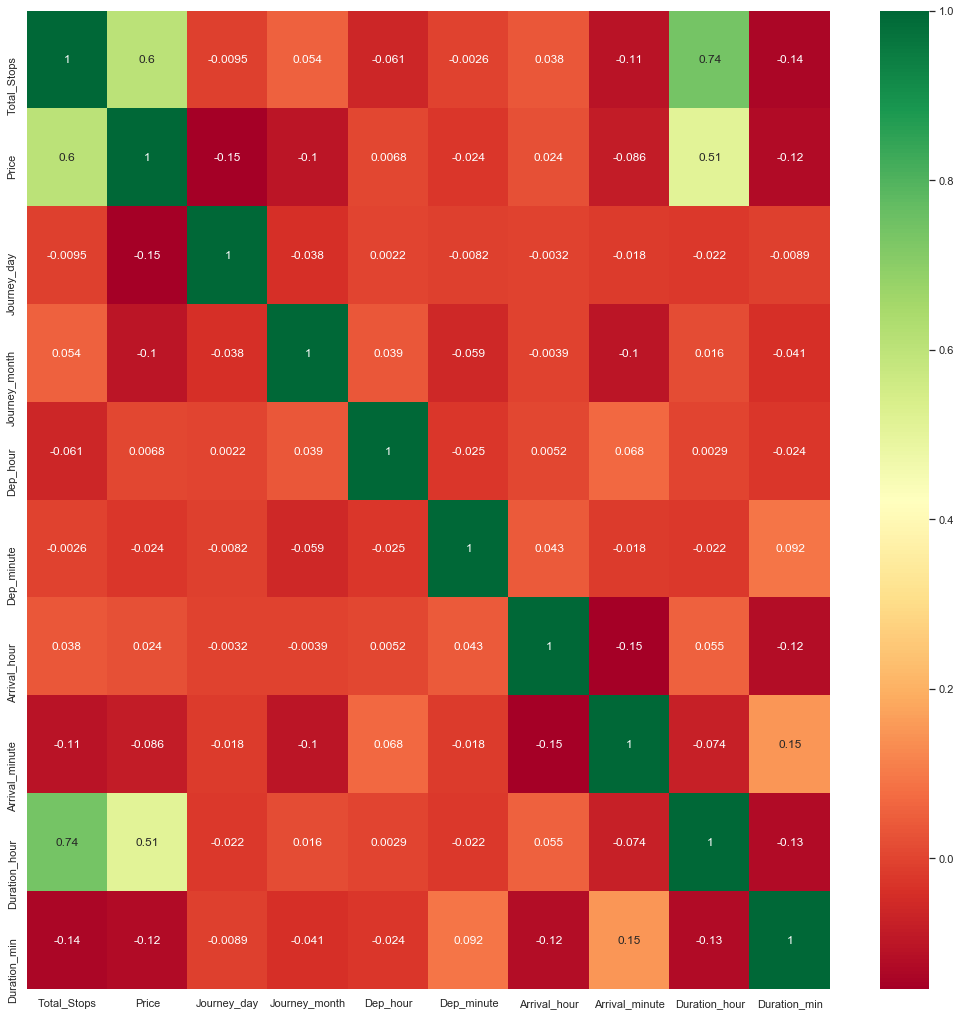

In [1783]:
# Lets Find correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))

sns.heatmap(train_data.corr(), annot = True, cmap = 'RdYlGn')
plt.show()

In [1785]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()

selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [1786]:
print(selection.feature_importances_)

[2.37782942e-01 1.44005418e-01 5.26777264e-02 2.44585176e-02
 2.11595238e-02 2.87951028e-02 1.89832510e-02 1.24536149e-01
 1.74940492e-02 8.46748583e-03 1.95846684e-03 1.84567808e-02
 1.31896711e-01 6.68243741e-02 1.82535248e-02 8.61987575e-04
 3.09540053e-03 1.19106439e-04 4.90409398e-03 9.01823514e-05
 5.43328775e-04 1.25776248e-02 3.19883219e-03 7.79192466e-03
 8.19342487e-03 1.26384210e-02 4.78492522e-03 4.96416618e-04
 2.49543087e-02]


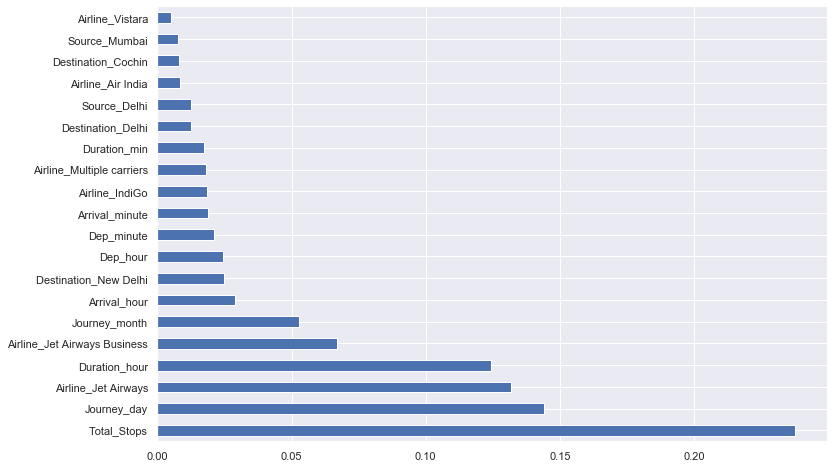

In [1788]:
# Plot graph of features importances for bettwe visulaization

plt.figure(figsize = (12,8))

feat_importances = pd.Series(selection.feature_importances_, index = X.columns)

feat_importances.nlargest(20).plot(kind = 'barh')

plt.show()

# Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t. X_test
2. If needed do scaling of data
- Scaling is not done in Random Forest
3. Import model
4. fit the data
5. Predict w.r.t. X_test
6. In regression check __REME__ score
7. Plot graph

In [1791]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 100)

In [1792]:
from sklearn.ensemble import RandomForestRegressor

reg_rf = RandomForestRegressor()

reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [1795]:
y_pred_train = reg_rf.predict(X_train)
y_pred_train

array([ 6828.49      ,  4093.56525   ,  3940.59      , ...,
        5862.35      ,  5152.29241667, 11431.25333333])

In [1796]:
reg_rf.score(X_train, y_train)

0.9532042907083919

In [1798]:
y_pred_test = reg_rf.predict(X_test)
y_pred_test

array([ 7017.77      ,  9386.83      , 12241.219     , ...,
       13422.20633333, 11444.77      , 14634.646     ])

In [1799]:
reg_rf.score(X_test, y_test)

0.8188344970175856

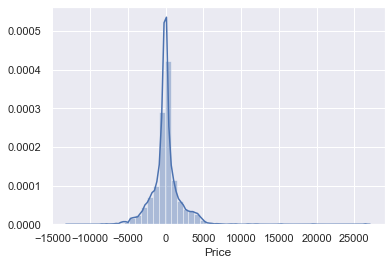

In [1800]:
sns.distplot(y_test - y_pred_test)
plt.show()

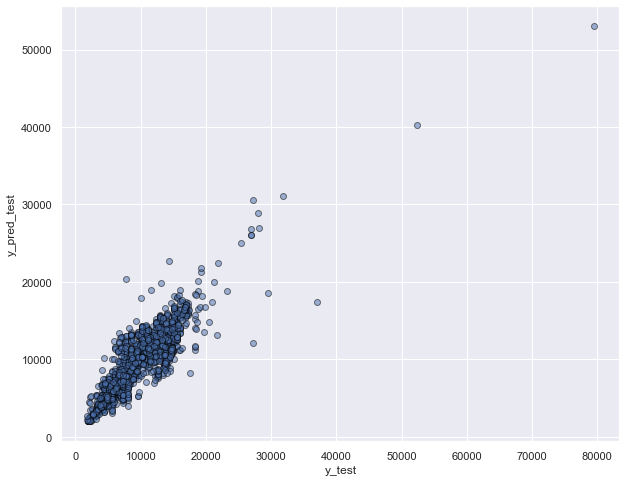

In [1803]:
plt.figure(figsize = (10,8))
plt.scatter(y_test, y_pred_test, alpha = 0.5, edgecolor = 'black')
plt.xlabel('y_test')
plt.ylabel('y_pred_test')

plt.show()

In [1804]:
from sklearn import metrics

In [1805]:
print('MAE : ', metrics.mean_absolute_error(y_test, y_pred_test))
print('MSE : ', metrics.mean_squared_error(y_test,y_pred_test))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

MAE :  1191.71051170298
MSE :  3949903.5519768344
RMSE :  1987.4364271535414


In [1807]:
metrics.r2_score(y_test,y_pred_test)

0.8188344970175856

# Hyperparameter Tuning

- Choose following method for hyperparameter tuning

    1. __RandomizedSearchCV__ --> Fast
    2. __GridSearchCV__

- Assign hyperparameters in form of dictionery
- Fit the model
- Check best parameters and best score

In [1808]:
from sklearn.model_selection import RandomizedSearchCV

In [1810]:
# Randomized Search CV

# Number of trees in random forest

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12 )]

# Number of features to consider at every split

max_features = ['auto', 'sqrt']

# Maximum number of levels in tree

max_depth = [int(x) for x in np.linspace(5,30, num = 6)]

# Minimum number of samples required to split a node

min_samples_split = [2,5,10,15,100]

# Minimum number of samples required at each leaf node

min_samples_leaf = [1,2,5,10]

In [1811]:
# Create the random Grid

random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [1813]:
# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations

rf_random = RandomizedSearchCV(estimator = reg_rf,
                              param_distributions = random_grid,
                              scoring = 'neg_mean_squared_error',
                              n_iter = 10, cv = 5,
                              verbose = 2, random_state = 42, n_jobs = 1)

In [1815]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.1s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [1816]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [1817]:
prediction = rf_random.predict(X_test)

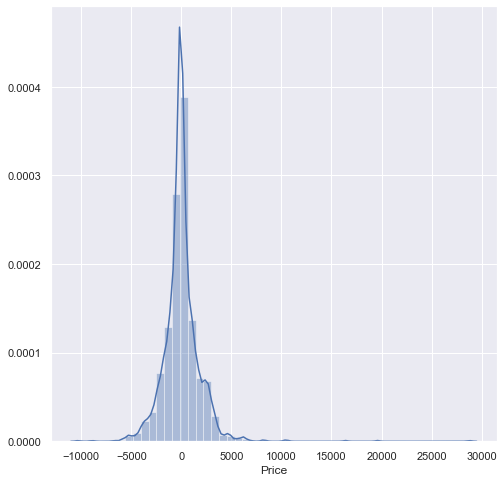

In [1818]:
plt.figure(figsize = (8,8))
sns.distplot(y_test - prediction)
plt.show()

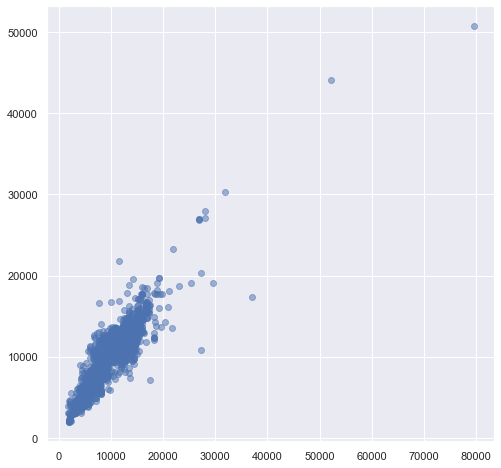

In [1819]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.show()

In [1820]:
print('MAE : ', metrics.mean_absolute_error(y_test, prediction))
print('MSE : ', metrics.mean_squared_error(y_test,prediction))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE :  1164.415873700238
MSE :  3523866.1934548756
RMSE :  1877.1963651826293


# Save the model to reuse it again

In [1821]:
import pickle

In [1828]:
# openfile, where you want to store the data

file = open('flight_pred_df.pkl', 'wb')

# Dump informaton to that file

pickle.dump(rf_random, file)

In [1829]:
model = open('flight_pred_df.pkl', 'rb')
forest = pickle.load(model)

In [1830]:
y_prediction = forest.predict(X_test)

In [1831]:
metrics.r2_score(y_test, y_prediction)

0.8383750430917553